In [1]:
# Import dependencies
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from gymnasium.wrappers import RescaleAction
from gymnasium.envs import register

import torch

import ray
from ray import tune
from ray.tune.registry import register_env
from ray.air import RunConfig
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.ppo import PPO
from ray.rllib.algorithms.algorithm import Algorithm
from ray.rllib.algorithms.algorithm_config import AlgorithmConfig

from stable_baselines3 import PPO as PPO_sb3
from stable_baselines3.common.callbacks import EvalCallback

from scipy.spatial.transform import Rotation as R

# Import modules
from Environment_Creator import env_creator
from Environment_Creator import Environments_enum

import matplotlib.pyplot as plt

from poliastro.plotting.matplotlib import OrbitPlotter2D

ModuleNotFoundError: No module named 'poliastro.plotting.matplotlib'

In [2]:
config = {}

In [4]:
env = env_creator(Environments_enum.Docking.value)
obs, info = env.reset()
for _ in range(1000):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    print(f"Step Reward: {reward}, Done: {done}")
    if done:
        print("Episode finished!")
        break

NameError: name 'max_thrust' is not defined

Negative Rewards:

The rewards are consistently negative, ranging from approximately -5.0 to -5.08. This indicates that the agent is not making progress toward docking and is being penalized for factors like distance, velocity, orientation, and fuel usage. The episode terminated with a significant penalty (Step Reward: -105.04660590061656, Done: True).

Iteration 0: reward = -874.9319077697345
Iteration 1: reward = -883.2991542661196
Iteration 2: reward = -894.7726563013313
Iteration 3: reward = -897.2621181717333
Iteration 4: reward = -902.9811782013743
Iteration 5: reward = -902.9323393113254
Iteration 6: reward = -896.381981113382
Iteration 7: reward = -891.0903634893743
Iteration 8: reward = -885.130290251768
Iteration 9: reward = -880.9021828443313
Iteration 10: reward = -882.3590025921812
Iteration 11: reward = -881.0212335095692
Iteration 12: reward = -880.7137428521378
Iteration 13: reward = -879.7922666245744
Iteration 14: reward = -877.0553465643769
Iteration 15: reward = -878.6386467195485
Iteration 16: reward = -882.5826651526473
Iteration 17: reward = -885.1248865746318
Iteration 18: reward = -890.8558077303621
Iteration 19: reward = -896.7296670570367
Iteration 20: reward = -900.3710521450374
Iteration 21: reward = -903.4963432088731
Iteration 22: reward = -903.6208917163982
Iteration 23: reward = -902.5116290917001
Iteration 24: reward = -907.0092657350216
Iteration 25: reward = -914.1737386438025
Iteration 26: reward = -924.592101995897
Iteration 27: reward = -933.1690004306192
Iteration 28: reward = -935.0036832729257

Initial tests show that there might not be any positive rewards, so the reward function needs to be refactored.

In [1]:
result = algo.train()
print(result.keys())

NameError: name 'algo' is not defined

The distance threshold (< 0.1) is too small.
Spacecraft might never reach exactly that position. Updating 0.5 or 1.0 instead.
Fuel may not be decreasing fast enough.
If np.linalg.norm(thrust) * 0.01 is too small, fuel might last too long.

Adjusted reward function.

In [4]:
register_env("SpacecraftDocking-v0", lambda config: env_creator(Environments_enum.Docking.value))

# Configure PPO training
config = (
    PPOConfig()
    .environment("SpacecraftDocking-v0")
    .framework("torch")  # Use PyTorch
    .env_runners(num_env_runners=1)  # Reduce for debugging
    .training(gamma=0.99, lr=1e-4, train_batch_size=1000)
    .resources(num_gpus=0.5)  # Adjust GPU usage
)

# Train the agent
algo = config.build()

for i in range(1000):
    result = algo.train()

    if result.get("episode_reward_mean") != None:
        print(f"Iteration {i}: reward = {result['env_runners']['episode_reward_mean']}")
    
    print(f"Iteration {i}: reward = {result['env_runners']['episode_return_mean']}")

2025-02-04 13:53:06,398	WARNING deprecation.py:50 -- DeprecationWarning: `build` has been deprecated. Use `AlgorithmConfig.build_algo` instead. This will raise an error in the future!
2025-02-04 13:53:06,405	WARNING algorithm_config.py:4702 -- You are running PPO on the new API stack! This is the new default behavior for this algorithm. If you don't want to use the new API stack, set `config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)`. For a detailed migration guide, see here: https://docs.ray.io/en/master/rllib/new-api-stack-migration-guide.html
C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\rllib\algorithms\algorithm.py:579: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
C:\Us

Iteration 0: reward = -859.4403044390851
Iteration 1: reward = -858.6353767912351
Iteration 2: reward = -859.4736073241496
Iteration 3: reward = -858.6872924779195
Iteration 4: reward = -857.4062494890251
Iteration 5: reward = -856.4162910985478
Iteration 6: reward = -855.5460703368261
Iteration 7: reward = -854.8011551179528
Iteration 8: reward = -854.0535589047805
Iteration 9: reward = -852.9985558207298
Iteration 10: reward = -851.746866860893
Iteration 11: reward = -851.1594997007124
Iteration 12: reward = -850.6701021385853
Iteration 13: reward = -851.0826938358919
Iteration 14: reward = -850.6361244536306
Iteration 15: reward = -851.2486215248474
Iteration 16: reward = -851.6948416949766
Iteration 17: reward = -851.6024269626531
Iteration 18: reward = -851.6567324672465
Iteration 19: reward = -852.3169407495485
Iteration 20: reward = -853.1113546497104
Iteration 21: reward = -853.8038479822999
Iteration 22: reward = -854.4460440833133
Iteration 23: reward = -854.4838290740112
Ite

KeyboardInterrupt: 

In [ ]:
result['env_runners']['episode_return_mean']

In [35]:
for _ in range(10):
    result = algo.train()
    print(result.get("episode_reward_mean"))

None
None
None
None
None
None
None
None
None
None


Done condition seems to be too rare.  
In 100 steps, only one episode terminated.  
Ideally, RL algorithms need more frequent resets to learn effectively.  

In [39]:
result = algo.train()
print("Episode Reward Mean:", result.get("episode_reward_mean"))

Episode Reward Mean: None


"Episode Reward Mean: None": episodes might not be tracked correctly due to long episode lengths or improper resets.

Currerntly thrust is applyed directly with a constant multiplier (0.05) and constrain using np.clip(action, -1, 1). This can lead to erratic behavior if the action space range isn't properly scaled or if the spacecraft needs more precise control.
Improvement:
```python
# Apply thrust (scaled by max thrust)
thrust = np.clip(action, -1, 1) * max_thrust
vx += thrust[0] * 0.1
vy += thrust[1] * 0.1
vz += thrust[2] * 0.1
```

Add `thrust` and udpate 0.05 to 0.1.

Fuel update: The fuel penalty is linear in its current form (-np.linalg.norm(thrust) * 0.01), which might not encourage fuel conservation well enough. Increasing the fuel penalty when fuel is low, introduces an exponential or logarithmic penalty to simulate resource scarcity more realistically.  
```python
reward_fuel = -np.linalg.norm(thrust) * 0.01 * (fuel + 0.1)
```

# Simple docking environment
#### SimpleDockingEnv:  
Simpler 2D version of the environment and no orientation control.

Key parameters to optimize:

- Discount factor (gamma): **0.99-0.999**

- Entropy coefficient: **0.01-0.1**

- Learning rate: **1e-5 to 3e-4**

- Batch size: **64-2048**

In [3]:
# Training & Evaluation Process
# Create environment
env = env_creator(Environments_enum.Docking_simple.value)

In [4]:
# Evaluation callback
eval_callback = EvalCallback(
    env,
    eval_freq=10000,
    n_eval_episodes=10,
    best_model_save_path="./best_model",
    deterministic=True
)
# Initialize PPO model
model = PPO_sb3(
    "MlpPolicy",
    env,
    verbose=1,
    learning_rate=1e-3,  # Increased learning rate
    gamma=0.99,
    n_steps=2048,
    batch_size=512,  # Larger batch size
    ent_coef=0.01,  # Higher entropy coefficient
    gae_lambda=0.95,
    clip_range=0.2,
    tensorboard_log="./ppo_docking_tensorboard/"
)

C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
# Training
model.learn(
    total_timesteps=5_000_000,
    callback=eval_callback
)
# Save the model
model.save("ppo_sb_docking")

Logging to ./ppo_docking_tensorboard/PPO_6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.5     |
|    ep_rew_mean     | 0.32     |
| time/              |          |
|    fps             | 1853     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | -0.0563     |
| time/                   |             |
|    fps                  | 1469        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010883335 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.56       |
|    explained_variance   | 0

In [14]:
# Initialize lists to store data
positions = []
rewards = []
steps = []

# Evaluation
obs = env.reset()
for step in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    
    # Store data for plotting
    positions.append(obs[:2])  # Store x, y position
    rewards.append(reward)     # Store reward
    steps.append(step)         # Store step number
    
    # Render and print (optional)
    env.render()
    print(f"Step: {step}, Reward: {reward}")
    
    if done:
        obs = env.reset()

Step: 1, State: [-4.74196689 -3.98810408 -0.62822361 -0.55561479]
Step: 0, Reward: -0.6743579335332548
Step: 2, State: [-4.79478926 -4.03366556 -0.52822361 -0.45561479]
Step: 1, Reward: -0.6756823158143077
Step: 3, State: [-4.83761162 -4.06922704 -0.4282236  -0.35561478]
Step: 2, Reward: -0.675602368298301
Step: 4, State: [-4.87043398 -4.09478851 -0.3282236  -0.25561478]
Step: 3, Reward: -0.674121536884568
Step: 5, State: [-4.89325634 -4.11034999 -0.2282236  -0.15561478]
Step: 4, Reward: -0.6712480719526749
Step: 6, State: [-4.9060787  -4.11591147 -0.1282236  -0.05561478]
Step: 5, Reward: -0.6670070181204821
Step: 7, State: [-4.90890106 -4.11147295 -0.0282236   0.04438522]
Step: 6, Reward: -0.6615235171962978
Step: 8, State: [-4.90172342 -4.09703443  0.0717764   0.14438522]
Step: 7, Reward: -0.6570963566211293
Step: 9, State: [-4.88454578 -4.0725959   0.1717764   0.24438523]
Step: 8, Reward: -0.6610515002641176
Step: 10, State: [-4.85736814 -4.03815738  0.27177641  0.34438523]
Step: 9,

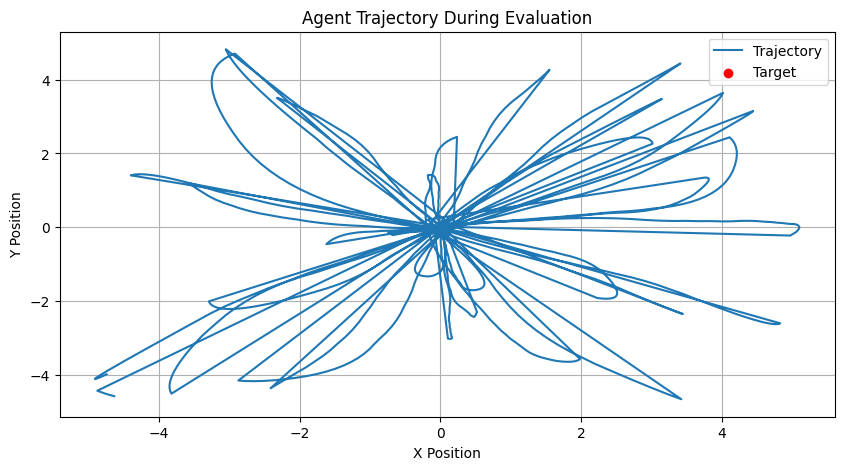

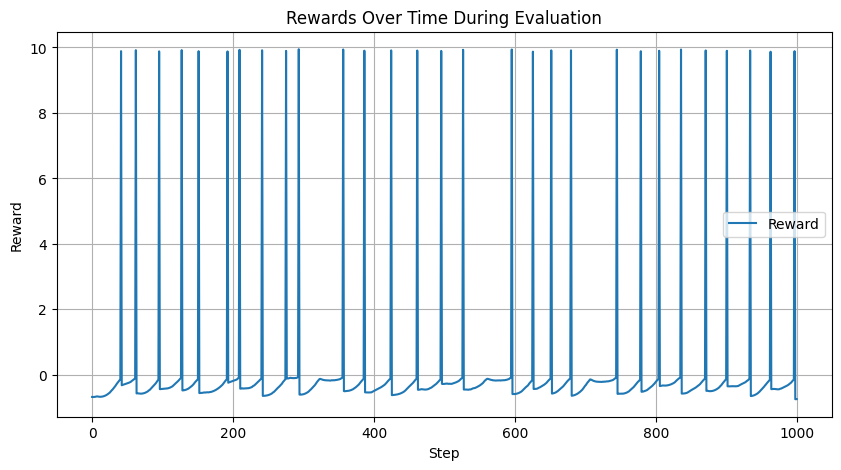

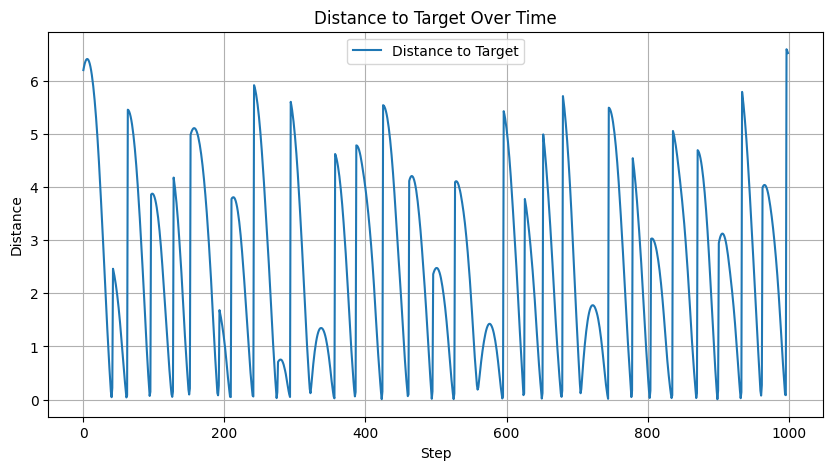

In [16]:
positions = np.array(positions)
rewards = np.array(rewards)
steps = np.array(steps)

# Plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(positions[:, 0], positions[:, 1], label="Trajectory")
plt.scatter([env.target_position[0]], [env.target_position[1]], color="red", label="Target")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Agent Trajectory During Evaluation")
plt.legend()
plt.grid()
plt.show()

# Plot the rewards over time
plt.figure(figsize=(10, 5))
plt.plot(steps, rewards, label="Reward")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Rewards Over Time During Evaluation")
plt.legend()
plt.grid()
plt.show()

# Calculate distance to target at each step
distances = np.linalg.norm(positions - env.target_position, axis=1)

# Plot distance to target over time
plt.figure(figsize=(10, 5))
plt.plot(steps, distances, label="Distance to Target")
plt.xlabel("Step")
plt.ylabel("Distance")
plt.title("Distance to Target Over Time")
plt.legend()
plt.grid()
plt.show()

1. General Observations
Negative Rewards:

Most rewards are negative, which is expected in a docking scenario where the agent is penalized for distance, velocity, and fuel usage.

The rewards are relatively small in magnitude (e.g., -0.59, -0.39), suggesting the agent is not failing catastrophically but also not making significant progress.

State Transitions:

The agent's position (x, y) and velocity (vx, vy) change gradually, indicating the agent is exploring the environment.

The velocity components (vx, vy) fluctuate, suggesting the agent is attempting to control its movement but not yet effectively.

Occasional Positive Rewards:

There are a few instances of large positive rewards (e.g., 9.90), which likely correspond to successful docking or significant progress toward the target.

2. Key Insights
A. Agent is Exploring but Not Learning Effectively
The agent is exploring the state space, as seen by the gradual changes in position and velocity.

However, the rewards are not improving significantly over time, indicating the agent is not learning effective policies.

B. Reward Function is Providing Feedback
The reward function is penalizing the agent for distance, velocity, and fuel usage, as intended.

The occasional large positive rewards suggest the reward function is correctly identifying successful behaviors.

C. Agent Struggles with Fine-Grained Control
The agent's velocity components (vx, vy) fluctuate significantly, indicating it is struggling to control its movement precisely.

This is common in early training when the agent has not yet learned to balance thrust and orientation.

D. Episodes are Terminating Prematurely
The agent often reaches the maximum episode length without docking successfully.

This suggests the task might be too complex for the current training setup.

3. Detailed Analysis of Specific Episodes
Episode 1 (Steps 1-39):
Initial State: [-2.95, 4.74, -0.45, 0.20]

The agent starts far from the target (x, y = -2.95, 4.74) with moderate velocity.

Behavior:

The agent reduces its distance to the target but overshoots and moves away again.

The velocity components fluctuate, indicating poor control.

Rewards:

Rewards are consistently negative but improve slightly as the agent gets closer to the target.

A large positive reward (9.90) is achieved at step 39, suggesting the agent briefly succeeded in docking.

Episode 2 (Steps 1-36):
Initial State: [-3.21, -1.29, -0.71, 0.23]

The agent starts far from the target with high velocity.

Behavior:

The agent reduces its distance to the target but struggles to control its velocity.

The velocity components fluctuate, and the agent does not stabilize its movement.

Rewards:

Rewards are consistently negative, with no significant improvement over time.

A large positive reward (9.90) is achieved at step 36, suggesting the agent briefly succeeded in docking.

4. Recommendations for Improvement
A. Reward Function Tuning
Add Intermediate Rewards:

Provide rewards for reducing distance to the target and aligning velocity.

Example: Reward the agent for getting closer to the target, not just for docking.

Reduce Penalties:

Make penalties less harsh to encourage exploration.

Example: Reduce the fuel penalty or velocity penalty.

B. Exploration Strategies
Increase Exploration:

Use a higher entropy coefficient or add noise to actions.

Example: Increase the entropy coefficient to 0.1.

Curriculum Learning:

Start with simpler tasks (e.g., 2D docking) and gradually increase complexity.

C. Algorithm Adjustments
Adjust Learning Rate:

Try a higher learning rate (e.g., 1e-3) to allow for faster policy updates.

Increase Batch Size:

Use a larger batch size (e.g., 512 or 1024) to stabilize training.

D. Environment Modifications
Simplify the Task:

Start with a 2D version of the task and gradually increase complexity.

Increase Episode Length:

Allow more steps per episode to give the agent time to learn.



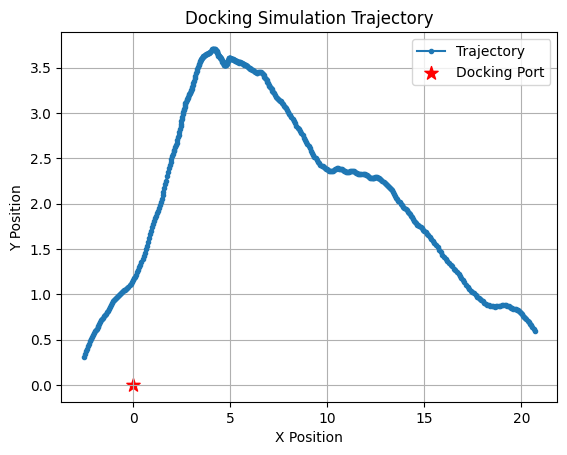

In [3]:
# Initialize the environment
env = env_creator(Environments_enum.Docking_simple.value)
state = env.reset()

# Storage for trajectory data
trajectory = [state[:2]]

# Run the simulation
for _ in range(env.max_steps):
    action = np.random.uniform(-0.5, 0.5, 2)  # Random thrust action
    state, reward, done, _ = env.step(action)
    trajectory.append(state[:2])  # Store position
    
    if done:
        break

# Convert to numpy array
trajectory = np.array(trajectory)

# Plot using matplotlib (Poliastro's plotting tools)
fig, ax = plt.subplots()
ax.plot(trajectory[:, 0], trajectory[:, 1], label="Trajectory", marker=".")
ax.scatter(0, 0, color='red', marker="*", s=100, label="Docking Port")  # Target location
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Docking Simulation Trajectory")
ax.legend()
plt.grid()
plt.show()